<a href="https://colab.research.google.com/github/lifeisbeautifu1/deep-learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/20
600/600 [==============================] - 10s 7ms/step - loss: 0.0439
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0210
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0159
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0139
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0124
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0114
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0108
Epoch 8/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0102
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0098
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0094
Epoch 11/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0091
Epoch 12/20
600/600 [====================

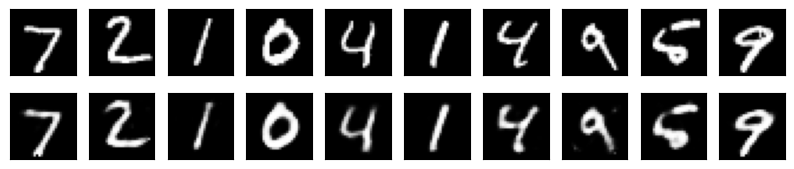

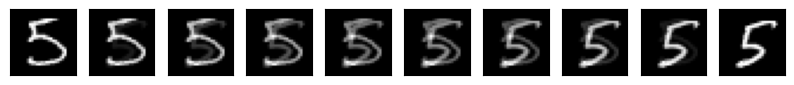

1/1 [==============================] - 0s 22ms/step


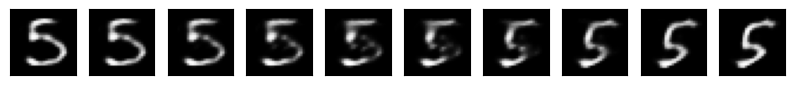

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist  # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

batch_size = 100

input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(28 * 28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

n = 10

imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax2 = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
  ax2.get_xaxis().set_visible(False)
  ax2.get_yaxis().set_visible(False)

plt.show()

def plot_digits(*images):
  images = [x.squeeze() for x in images]
  n = images[0].shape[0]  # число изображений

  plt.figure(figsize=(n, len(images)))
  for j in range(n):
    for i in range(len(images)):
      ax = plt.subplot(len(images), n, i * n + j + 1)
      plt.imshow(images[i][j])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()


def plot_homotopy(frm, to, n=10, autoencoder=None):
  z = np.zeros(([n] + list(frm.shape)))
  for i, t in enumerate(np.linspace(0., 1., n)):
    z[i] = frm * (1 - t) + to * t  # Гомотопия по прямой
  if autoencoder:
    plot_digits(autoencoder.predict(z, batch_size=n))
  else:
    plot_digits(z)


frm, to = x_test[y_test == 5][1:3]
plot_homotopy(frm, to)
plot_homotopy(frm, to, autoencoder=autoencoder)